In [19]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

In [37]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('D:/Misc/Shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

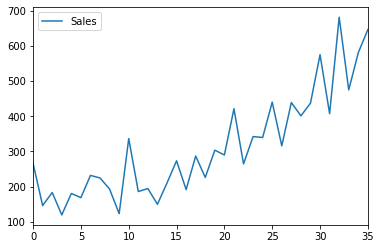

In [22]:
series.plot()
pyplot.show()

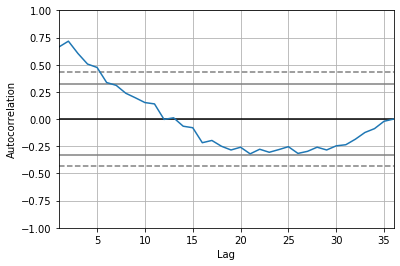

In [40]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('D:/Misc/Shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

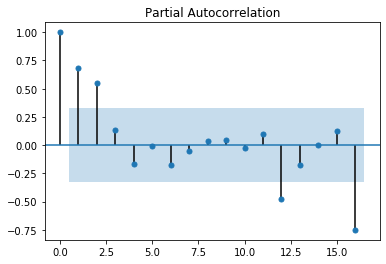

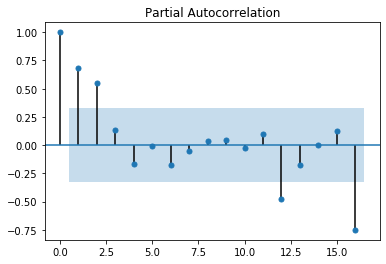

In [42]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, ax=pyplot.gca())

In [44]:
from statsmodels.tsa.arima_model import ARIMA

In [97]:
model = ARIMA(series, order=(5,1,0))

C:\Users\11031\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\11031\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [98]:
model_fit = model.fit()

In [59]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -192.115
Method:                       css-mle   S.D. of innovations             53.288
Date:                Fri, 10 Jan 2020   AIC                            400.231
Time:                        12:33:04   BIC                            412.674
Sample:                    02-01-1901   HQIC                           404.526
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.2700      3.163      3.880      0.001       6.071      18.469
ar.L1.D.Sales    -0.4734      0.216     -2.192      0.037      -0.897      -0.050
ar.L2.D.Sales    -0.6334      0.191     

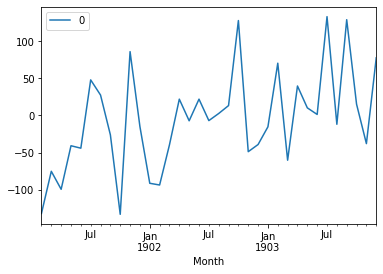

In [99]:
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
residuals = DataFrame(model_fit.resid)
residuals.plot()

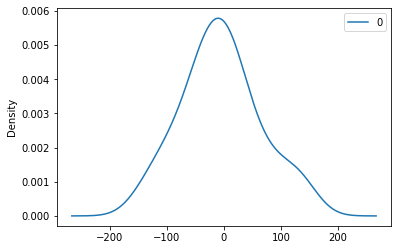

In [100]:
residuals.plot(kind='kde')

In [101]:
residuals.describe()

,0
count,35.000000
mean,-5.495216
std,68.132882
min,-133.296656
25%,-42.477819
50%,-7.186509
75%,24.748311
max,133.237940


In [102]:
output = model_fit.forecast()

In [103]:
output

(array([564.2135282]),
 array([64.2414205]),
 array([[438.30265769, 690.1243987 ]]))

In [104]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=349.117692, expected=342.300000
predicted=306.512866, expected=339.700000
predicted=387.376465, expected=440.400000
predicted=348.154144, expected=315.900000
predicted=386.308801, expected=439.300000
predicted=356.082088, expected=401.300000
predicted=446.379471, expected=437.400000
predicted=394.737288, expected=575.500000
predicted=434.915413, expected=407.600000
predicted=507.923472, expected=682.000000
predicted=435.482761, expected=475.300000
predicted=652.743901, expected=581.300000
predicted=546.343472, expected=646.900000
Test MSE: 6958.326


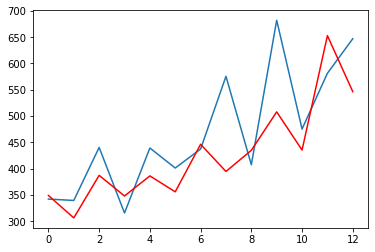

In [105]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')